In [39]:
import pandas as pd
import seaborn as sns
from plot_utils import *

In [40]:
# load datasets

EventsAdapt_df = pd.read_csv("EventsAdapt.MAIN.csv")
EventsAdapt_humandf = pd.read_csv("EventsAdapt.MAIN.human.csv")
DTFit_df = pd.read_csv("DTFit.MAIN.csv")
DTFit_human_df = pd.read_csv("DTFit.MAIN.human.csv")

In [41]:
EventsAdapt_df

,Unnamed: 0,corpus,model,task,Accuracy
0,0,EventsAdapt_AI,Mistral-7B-Instruct-v0.1,logprobs,1
1,1,EventsAdapt_AI,Mistral-7B-v0.1,logprobs,0
2,2,EventsAdapt_AI,falcon-7b-instruct,logprobs,0
3,3,EventsAdapt_AI,falcon-7b,logprobs,1
4,4,EventsAdapt_AI,gpt2-xl,logprobs,1
...,...,...,...,...,...
25181,25181,EventsAdapt_AAN,falcon-7b-instruct,sentence_judge_generation_likert,1
25182,25182,EventsAdapt_AAN,falcon-7b,sentence_judge_generation_likert,1
25183,25183,EventsAdapt_AAN,gpt2-xl,sentence_judge_generation_likert,0
25184,25184,EventsAdapt_AAN,mpt-7b-instruct,sentence_judge_generation_likert,0


In [42]:
DTFit_df["corpus"] = "DTFit"
DTFit_df

,Unnamed: 0,model,task,Accuracy,corpus
0,0,Mistral-7B-Instruct-v0.1,logprobs,1,DTFit
1,1,Mistral-7B-Instruct-v0.1,logprobs,1,DTFit
2,2,Mistral-7B-Instruct-v0.1,logprobs,1,DTFit
3,3,Mistral-7B-Instruct-v0.1,logprobs,0,DTFit
4,4,Mistral-7B-Instruct-v0.1,logprobs,1,DTFit
...,...,...,...,...,...
19745,390,mpt-7b,sentence_judge_generation_likert,1,DTFit
19746,391,mpt-7b,sentence_judge_generation_likert,0,DTFit
19747,392,mpt-7b,sentence_judge_generation_likert,0,DTFit
19748,393,mpt-7b,sentence_judge_generation_likert,1,DTFit


In [43]:
merged = pd.concat([EventsAdapt_df, DTFit_df])
plot_df = merged.loc[merged.task.isin(["logprobs", "sentence_comparison"])] #Best prompt
plot_df["PrettyModel"] = plot_df.model.apply(lambda x: PRETTYNAMES[x])
plot_df["PrettyTask"] = plot_df.task.apply(lambda x: "LogProbs" if x == "logprobs" else "Prompting")
plot_df['PrettyDataset'] = plot_df['corpus'].apply(lambda x: 'AI' if x == 'EventsAdapt_AI' else 'AA' if x == 'EventsAdapt_AAN' else 'DTFit')
plot_df = plot_df.loc[plot_df.PrettyModel != "GPT2-xl"]
plot_df["ModelClass"] = plot_df.PrettyModel.apply(lambda x: x.split(" ")[0])
plot_df["ModelVersion"] = plot_df.PrettyModel.apply(lambda x: x.split(" ")[1].lstrip("(").rstrip(")").upper())
plot_df["ModelVersion+Task"] = plot_df["ModelVersion"].astype(str) + " | " + plot_df["PrettyTask"].astype(str)

plot_df

/tmp/ipykernel_3994652/729184592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["PrettyModel"] = plot_df.model.apply(lambda x: PRETTYNAMES[x])
/tmp/ipykernel_3994652/729184592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["PrettyTask"] = plot_df.task.apply(lambda x: "LogProbs" if x == "logprobs" else "Prompting")
/tmp/ipykernel_3994652/729184592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,Unnamed: 0,corpus,model,task,Accuracy,PrettyModel,PrettyTask,PrettyDataset,ModelClass,ModelVersion,ModelVersion+Task
0,0,EventsAdapt_AI,Mistral-7B-Instruct-v0.1,logprobs,1,Mistral (instr.),LogProbs,AI,Mistral,INSTR.,INSTR. | LogProbs
1,1,EventsAdapt_AI,Mistral-7B-v0.1,logprobs,0,Mistral (base),LogProbs,AI,Mistral,BASE,BASE | LogProbs
2,2,EventsAdapt_AI,falcon-7b-instruct,logprobs,0,Falcon (instr.),LogProbs,AI,Falcon,INSTR.,INSTR. | LogProbs
3,3,EventsAdapt_AI,falcon-7b,logprobs,1,Falcon (base),LogProbs,AI,Falcon,BASE,BASE | LogProbs
5,5,EventsAdapt_AI,mpt-7b-instruct,logprobs,0,MPT (instr.),LogProbs,AI,MPT,INSTR.,INSTR. | LogProbs
...,...,...,...,...,...,...,...,...,...,...,...
13820,390,DTFit,mpt-7b,sentence_comparison,1,MPT (base),Prompting,DTFit,MPT,BASE,BASE | Prompting
13821,391,DTFit,mpt-7b,sentence_comparison,1,MPT (base),Prompting,DTFit,MPT,BASE,BASE | Prompting
13822,392,DTFit,mpt-7b,sentence_comparison,1,MPT (base),Prompting,DTFit,MPT,BASE,BASE | Prompting
13823,393,DTFit,mpt-7b,sentence_comparison,1,MPT (base),Prompting,DTFit,MPT,BASE,BASE | Prompting


/tmp/ipykernel_3994652/2937672837.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['ModelVersion+Task'] = pd.Categorical(curr_df['ModelVersion+Task'], categories=MODELTASK_LIST, ordered=True)


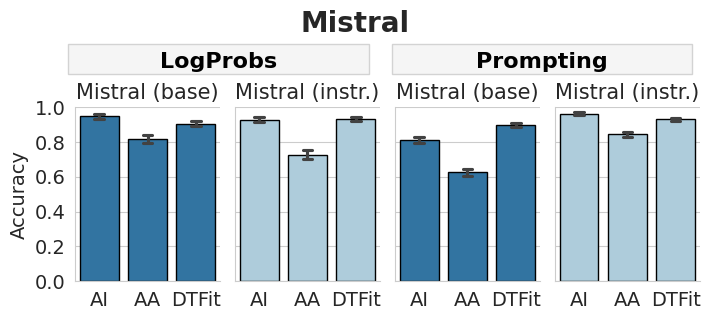

/tmp/ipykernel_3994652/2937672837.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['ModelVersion+Task'] = pd.Categorical(curr_df['ModelVersion+Task'], categories=MODELTASK_LIST, ordered=True)


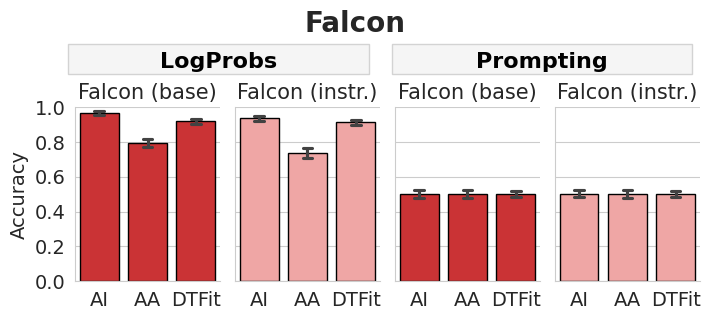

/tmp/ipykernel_3994652/2937672837.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['ModelVersion+Task'] = pd.Categorical(curr_df['ModelVersion+Task'], categories=MODELTASK_LIST, ordered=True)


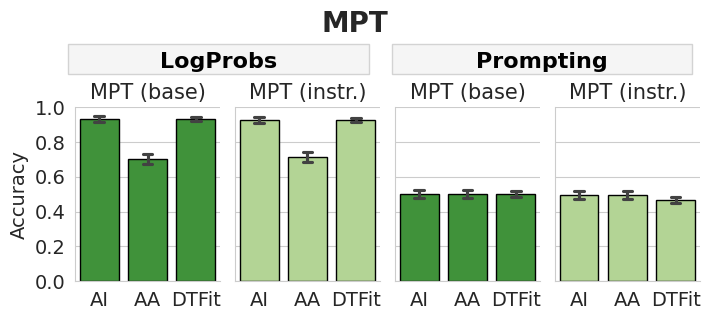

In [51]:
import numpy as np
from matplotlib.patches import Rectangle
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

MODELTASK_LIST = ["BASE | LogProbs", "INSTR. | LogProbs", "BASE | Prompting", "INSTR. | Prompting"]

# Define a dictionary for hatching patterns based on dataset names
hatch_patterns = {"AI": "|", "AA": "/", "DTFit": "\\"}

for model_class in ["Mistral", "Falcon", "MPT"]:
    curr_df = plot_df.loc[plot_df.ModelClass == model_class]
    curr_df['ModelVersion+Task'] = pd.Categorical(curr_df['ModelVersion+Task'], categories=MODELTASK_LIST, ordered=True)
    g = sns.FacetGrid(curr_df, col="ModelVersion+Task", hue="model", margin_titles=True, sharey=True, palette=MODEL_PAL,
                     height=3, aspect=0.6)
    
    def plot_func(x, y, **kwargs):
        bars = sns.barplot(x=x, y=y, edgecolor='black', errorbar='se', capsize=0.2, **kwargs)
    
    g.map_dataframe(plot_func, x="PrettyDataset", y="Accuracy")
    g.set(yticks=np.linspace(0, 2, 11))  # Adjust as needed to set specific y-ticks
    g.set(ylim=(0, 1))  # Force the y-axis to range from 0 to 1

    # Add labels and legend
    g.set_axis_labels("", "Accuracy", fontsize=14)

    # Set label font sizes for each facet in the grid
    for ax in g.axes.flat:
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)

    fig = plt.gcf()

    logprobs_box = g.axes.flat[0].get_position()
    prompting_box = g.axes.flat[2].get_position()

    height = 0.1  # Height of the box in figure coordinates
    width_logprobs = logprobs_box.x1 - logprobs_box.x0 + (g.axes.flat[1].get_position().x1 - g.axes.flat[1].get_position().x0) + 0.005
    width_prompting = prompting_box.x1 - prompting_box.x0 + (g.axes.flat[3].get_position().x1 - g.axes.flat[3].get_position().x0) + 0.005

    rect_logprobs = Rectangle((logprobs_box.x0+0.01, logprobs_box.y1 - height/2), width_logprobs, height, facecolor="whitesmoke", edgecolor="lightgray", transform=fig.transFigure, clip_on=False)
    rect_prompting = Rectangle((prompting_box.x0+0.005, prompting_box.y1 - height/2), width_prompting, height, facecolor="whitesmoke", edgecolor="lightgray", transform=fig.transFigure, clip_on=False)

    fig.patches.extend([rect_logprobs, rect_prompting])

    # Add text on rectangles
    fig.text(logprobs_box.x0+0.01 + width_logprobs / 2, logprobs_box.y1 - height / 10, 'LogProbs', ha='center', va='center', fontsize=16, fontweight='bold', color='black')
    fig.text(prompting_box.x0+0.005 + width_prompting / 2, prompting_box.y1 - height / 10, 'Prompting', ha='center', va='center', fontsize=16, fontweight='bold', color='black')

    
    # Setting custom titles for rows
    g.set_titles(col_template="{col_name}")
    for subx in g.axes.flatten():       
        if subx.get_title() != "":
            subx.set_title(f'{model_class} ({subx.get_title().split(" | ")[0].lower()})', fontweight='regular', fontsize=15)
    
    plt.suptitle(model_class, fontweight='bold', size=20, y=1.05)

    g.tight_layout()

    plt.savefig(f'figures/PromptChoice.{model_class}.newAnalysis.withTitle.svg', dpi=280, bbox_inches="tight")
    plt.savefig(f'figures/PromptChoice.{model_class}.newAnalysis.withTitle.png', dpi=280, bbox_inches="tight")
        
    plt.show()